In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)  # so that I can have consistent results
N = 1000
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)

# create a linear relationship between x1, x2 and y
y = -3 * x1 + 2 * x2 + np.random.normal(0, 6, N)

X = np.column_stack((x1, x2))

Intercept: 0.18610400404817362
Coefficients: [-3.0202283   1.99815263]


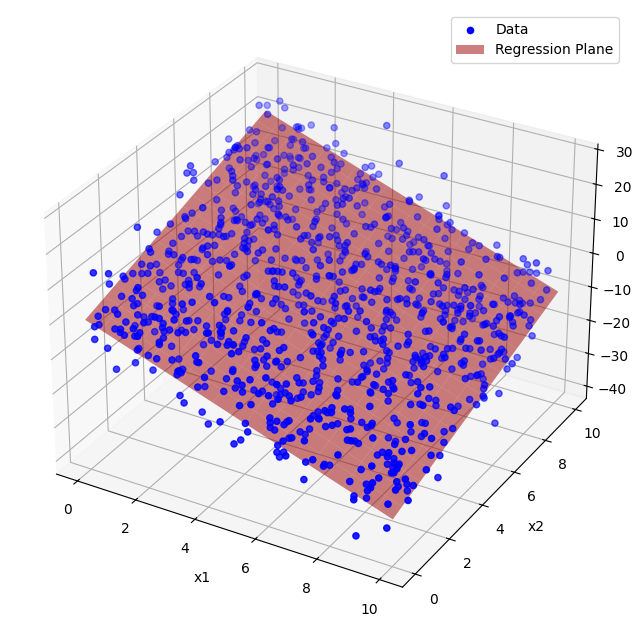

In [3]:
from mpl_toolkits.mplot3d import Axes3D

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_  # [slope_x1, slope_x2]
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# plot in 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='b', label='Data')

x1_grid, x2_grid = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
y_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, color='r', alpha=0.5, label='Regression Plane')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')
plt.legend()
plt.show()


# Now to build a model in 3D

Is the principle the same, mathematically? Can the same ideas just be split into orthogonal $X_i$ elements?

In [4]:
# Just try, and assume that this is true:

"""
N-dimensional linear regression equatoins
"""

def z(X_i):  # Z-scores for a variable set
    X_i = np.array(X_i)
    return (X_i - np.mean(X_i)) / np.std(X_i)

def r(X_i, Y):  # correlation score for a dependent variable X_i against Y
    X_i, Y = np.array(X_i), np.array(Y)
    if len(X_i) != len(Y):
        raise ValueError("X_i and Y are arrays of different lengths")
    
    return np.sum(z(X_i) * z(Y)) / len(X_i)

def slope(X, Y):  # the slope vector for each orthogonal independent variable
    X = np.array(X)  # Ensure X is a numpy array (matrix)
    return np.array([r(X[:, i], Y) * np.std(Y) / np.std(X[:, i]) for i in range(X.shape[1])])

def intercept(X, Y):  # the y intercept of the linear regression model
    X = np.array(X)
    return np.mean(Y) - np.dot(slope(X, Y), np.mean(X, axis=0))

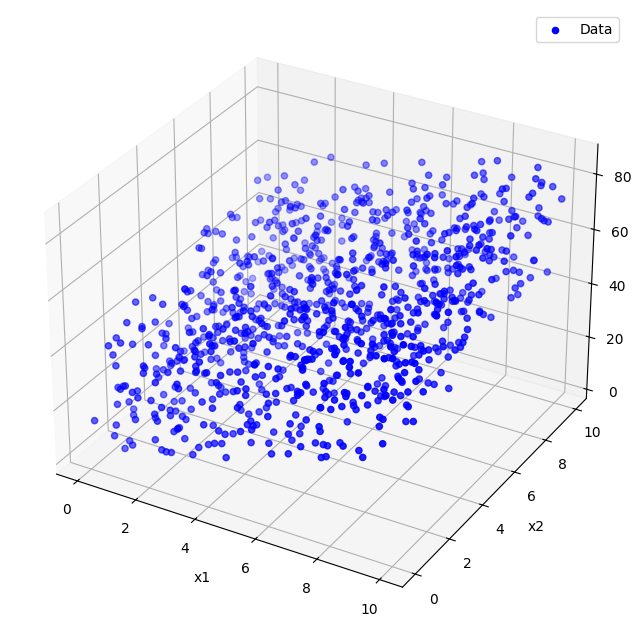

In [ ]:
np.random.seed(1)
n_samples = 1000
X = np.random.uniform(0, 10, (n_samples, 3))  # 3 independent variables
Y = 3 * X[:, 0] + 2 * X[:, 1] + 4 * X[:, 2] + np.random.normal(0, 1, n_samples)  # Linear combination

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='b', label='Data')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')
plt.legend()
plt.show()

In [6]:
# Calculate slope and intercept for N-dimensional linear regression
my_slope = slope(X, Y)
my_intercept = intercept(X, Y)

# Fit the sklearn LinearRegression model
model = LinearRegression()
model.fit(X, Y)

# Get the sklearn model's coefficients and intercept
sklearn_slope = model.coef_
sklearn_intercept = model.intercept_

print("My Custom Model:")
print(f"    Slope: {my_slope}")
print(f"    Intercept: {my_intercept}")

print("\nScikit-learn Model:")
print(f"    Slope: {sklearn_slope}")
print(f"    Intercept: {sklearn_intercept}")

My Custom Model:
    Slope: [3.10275443 2.04163645 4.0515893 ]
    Intercept: -0.9841531422706353

Scikit-learn Model:
    Slope: [3.00636665 2.00078678 3.99236968]
    Intercept: 0.0034561030982374064


In [7]:
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
x2_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 20)
x3_fixed = np.mean(X[:, 2])

X1, X2 = np.meshgrid(x1_range, x2_range)

my_preds = my_slope[0] * X1 + my_slope[1] * X2 + my_slope[2] * x3_fixed + my_intercept
sklearn_preds = sklearn_slope[0] * X1 + sklearn_slope[1] * X2 + sklearn_slope[2] * x3_fixed + sklearn_intercept

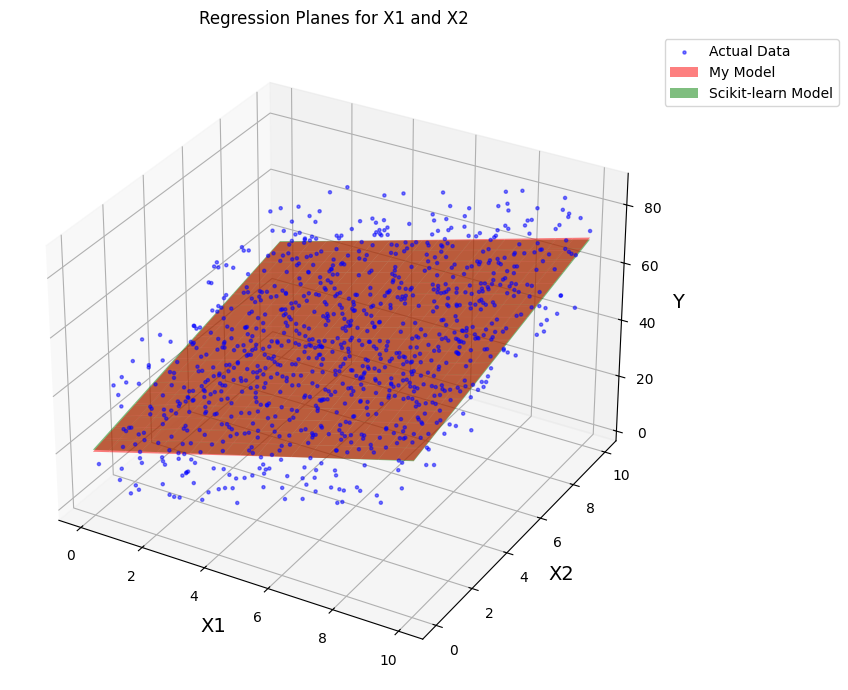

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(X[:, 0], X[:, 1], Y, s=5, c="b", label="Actual Data", alpha=0.5)

ax.plot_surface(X1, X2, my_preds, color="r", alpha=0.5, label="My Model")
ax.plot_surface(X1, X2, sklearn_preds, color="green", alpha=0.5, label="Scikit-learn Model")

ax.set_xlabel("X1", fontsize = 14)
ax.set_ylabel("X2", fontsize = 14)
ax.set_zlabel("Y", fontsize = 14)
ax.set_title("Regression Planes for X1 and X2")

plt.tight_layout()

plt.legend()
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()